In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed
np.random.seed(42)

In [3]:
import pandas as pd
# Load dataset
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\project admission\\Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns = df.columns.str.strip()
df.rename(columns={'LOR': 'LOR'}, inplace=True)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [7]:
# Check for missing values
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [8]:
# Drop missing values
df = df.dropna()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['GRE Score', 'TOEFL Score', 'CGPA']] = scaler.fit_transform(df[['GRE Score', 'TOEFL Score', 'CGPA']])
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65


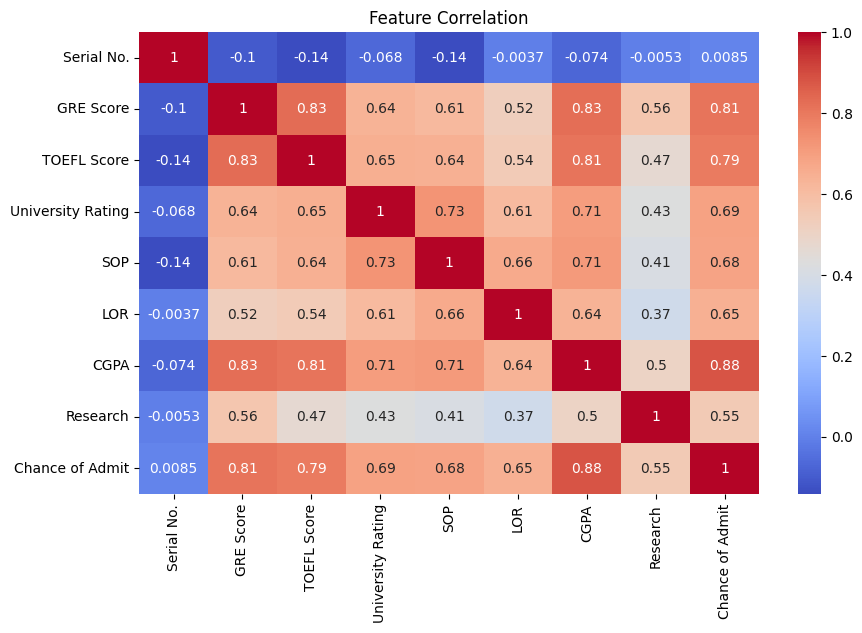

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [11]:
# Define features (X) and target (y)
X = df.drop(columns=['Serial No.', 'Chance of Admit'], errors='ignore')
y = df['Chance of Admit']

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Print shapes
print(f"Training shape: {X_train_scaled.shape}")
print(f"Testing shape: {X_test_scaled.shape}")

Training shape: (400, 7)
Testing shape: (100, 7)


In [15]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)
# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {round(mse_lr, 4)}")
print(f"R² Score: {round(r2_lr, 4)}")

Linear Regression Results:
Mean Squared Error (MSE): 0.0037
R² Score: 0.8188


In [16]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)
# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Results:")
print(f"Mean Squared Error (MSE): {round(mse_rf, 4)}")
print(f"R² Score: {round(r2_rf, 4)}")

Random Forest Results:
Mean Squared Error (MSE): 0.0043
R² Score: 0.7887


In [17]:
# Build ANN model
ann_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
# Compile model
ann_model.compile(optimizer='adam', loss='mean_squared_error')
# Add early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
# Train model
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0, callbacks=[early_stop])
# Predict on test set
y_pred_ann = ann_model.predict(X_test_scaled).flatten()
# Evaluate
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print("Regularized ANN Results:")
print(f"Mean Squared Error (MSE): {round(mse_ann, 4)}")
print(f"R² Score: {round(r2_ann, 4)}")

4/4 [==============================] - 0s 6ms/step
Regularized ANN Results:
Mean Squared Error (MSE): 0.0044
R² Score: 0.7869


In [26]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/150.0 MB 11.6 MB/s eta 0:00:13
   ---------------------------------------- 1.4/150.0 MB 17.6 MB/s eta 0:00:09
    --------------------------------------- 2.8/150.0 MB 20.0 MB/s eta 0:00:08
    --------------------------------------- 3.7/150.0 MB 19.8 MB/s eta 0:00:08
   - -------------------------------------- 4.5/150.0 MB 19.0 MB/s eta 0:00:08
   - -------------------------------------- 4.5/150.0 MB 19.1 MB/s eta 0:00:08
   - -------------------------------------- 4.6/150.0 MB 13.9 MB/s eta 0:00:11
   - -------------------------------------- 5.5/150.0 MB 14.6 MB/s eta 0:00:10
   - -------------------------------------- 6.3/150.0 MB 15.0 MB/s eta 0:00:10
   - -------------------------------------- 7.2/150.0 MB 15.3 MB/s eta 0:00:10
   -- ------------------------------------- 8.0/150.0 MB 15.5 MB/s eta 0:00:10
   -- ------------------------------------- 8.6/150.0 MB 14.

In [28]:
#XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Results:")
print(f"Mean Squared Error (MSE): {round(mse_xgb, 4)}")
print(f"R² Score: {round(r2_xgb, 4)}")

ModuleNotFoundError: No module named 'xgboost'

In [20]:
# Create a DataFrame for model comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'ANN', 'XGBoost'],
    'MSE': [mse_lr, mse_rf, mse_ann,mse_xgb],
    'R² Score': [r2_lr, r2_rf, r2_ann,r2_xgb]
})
print("\nModel Comparison:")
print(results)
# Visualize model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² Score', data=results, palette=['#36A2EB', '#FF6384', '#FFCE56'])
plt.title('Model Performance Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

NameError: name 'mse_xgb' is not defined

In [22]:
# Feature importance for Random Forest
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Feature importance for XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='viridis', ax=ax1)
ax1.set_title('Feature Importance (Random Forest)')
ax1.set_xlabel('Importance')
ax1.set_ylabel('Feature')
sns.barplot(x='Importance', y='Feature', data=xgb_importance, palette='magma', ax=ax2)
ax2.set_title('Feature Importance (XGBoost)')
ax2.set_xlabel('Importance')
ax2.set_ylabel('Feature')
plt.tight_layout()
plt.show()

NameError: name 'xgb_model' is not defined

In [23]:
# Save Models for Deployment
import pickle
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
print("R² Scores:")
print(f"Random Forest: {r2_rf:.4f}")
print(f"XGBoost: {r2_xgb:.4f}")
print("Training features:", X.columns.tolist())
print("Files saved: rf_model.pkl xgb_model.pkl scaler.pkl")

NameError: name 'xgb_model' is not defined

In [24]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_scaled, y_train)
print(f"Random Forest Best Parameters: {grid_search_rf.best_params_}")
print(f"Random Forest Best R² Score: {grid_search_rf.best_score_:.4f}")

param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]}
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train_scaled, y_train)
print(f"XGBoost Best Parameters: {grid_search_xgb.best_params_}")
print(f"XGBoost Best R² Score: {grid_search_xgb.best_score_:.4f}")

Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Random Forest Best R² Score: 0.7788


NameError: name 'XGBRegressor' is not defined

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
for model, name in [ (rf_model, 'Random Forest'), (xgb_model, 'XGBoost')]:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name} CV R² Scores: {cv_scores}")
    print(f"{name} Average CV R² Score: {np.mean(cv_scores):.4f}")

In [ ]:
#shap
import shap
# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)
# Set random seed for SHAP explicitly
np.random.default_rng(42)  # Replaces np.random.seed(42)
# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)



In [258]:
!pip install streamlit


In [259]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np
import os

st.title("Graduate Admission Prediction")

# Check for required files
required_files = ['rf_model.pkl', 'xgb_model.pkl', 'scaler.pkl']
for file in required_files:
    if not os.path.exists(file):
        st.error(f"Required file {file} not found. Please ensure all model and scaler files are in the working directory.")
        st.stop()

# Load models and scaler
try:
    rf_model = pickle.load(open('rf_model.pkl', 'rb'))
    xgb_model = pickle.load(open('xgb_model.pkl', 'rb'))
    scaler = pickle.load(open('scaler.pkl', 'rb'))
except FileNotFoundError:
    st.error("Model or scaler file not found. Please upload required files.")
    st.stop()
except Exception as e:
    st.error(f"Error loading models: {str(e)}")
    st.stop()

# Define feature names
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

# Input fields
gre = st.number_input("GRE Score (260-340)", 260, 340, value=300)
toefl = st.number_input("TOEFL Score (0-120)", 0, 120, value=100)
univ_rating = st.number_input("University Rating (1-5)", 1, 5, value=3)
sop = st.number_input("SOP Strength (1-5)", 1.0, 5.0, value=3.0)
lor = st.number_input("LOR Strength (1-5)", 1.0, 5.0, value=3.0)
cgpa = st.number_input("CGPA (6-10)", 6.0, 10.0, value=8.0)
research = st.selectbox("Research Experience", [0, 1], index=0)

if st.button("Predict"):
    try:
        user_input = pd.DataFrame([[gre, toefl, univ_rating, sop, lor, cgpa, research]],
                                 columns=feature_names)
        user_scaled = scaler.transform(user_input)

        # Get predictions from Random Forest and XGBoost
        rf_pred = rf_model.predict(user_scaled)[0]
        xgb_pred = xgb_model.predict(user_scaled)[0]

        # Compute mean prediction
        mean_pred = np.mean([rf_pred, xgb_pred])

        # Ensure prediction is within valid range
        mean_pred = np.clip(mean_pred, 0, 1)

        # Display prediction
        st.write(f"Predicted Chance of Admission: {round(mean_pred * 100, 2)}%")
    except Exception as e:
        st.error(f"Error in prediction: {str(e)}")

Overwriting app.py


In [260]:
!ls

Admission_Predict_Ver1.1.csv  lr_model.pkl	rf_model.pkl
ann_model.h5		      README.md		scaler.pkl
app.py			      requirements.txt	xgb_model.pkl


In [261]:
!pip install pyngrok

In [262]:
from pyngrok import ngrok
ngrok.kill()


In [ ]:
from pyngrok import ngrok
import subprocess
import time
import os

# OPTIONAL: Better to load auth token from env
# os.environ["NGROK_AUTH_TOKEN"] = "your_token_here"
ngrok.set_auth_token("2y0ZkY48TtNqL0k22tCJHbYApt0_6MA4KFNcxNRdAxKhhHBYi")

# Launch Streamlit app
print("Starting Streamlit app...")
streamlit_process = subprocess.Popen(
    ["streamlit", "run", "app.py", "--server.port", "8501"],
    stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT
)

# Give Streamlit time to spin up
time.sleep(5)

# Create ngrok tunnel
print("Starting ngrok tunnel...")
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

# Optional: keep alive until manually stopped
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Shutting down...")
    streamlit_process.terminate()
    ngrok.kill()


Starting Streamlit app...
Starting ngrok tunnel...
Streamlit app is live at: NgrokTunnel: "https://f6d0-35-232-254-36.ngrok-free.app" -> "http://localhost:8501"
